In [ ]:
# Install the library
pip install umap-learn

In [ ]:
# Additional plotting module
pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.2 MB/s eta 0:00:00


In [ ]:
# Import a bunch of libraries

import umap
import umap.plot
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sympy
import scipy
%matplotlib inline

In [ ]:
# Get the dataset of Penguins
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Remove missing values
penguins = penguins.dropna()
penguins.species.value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


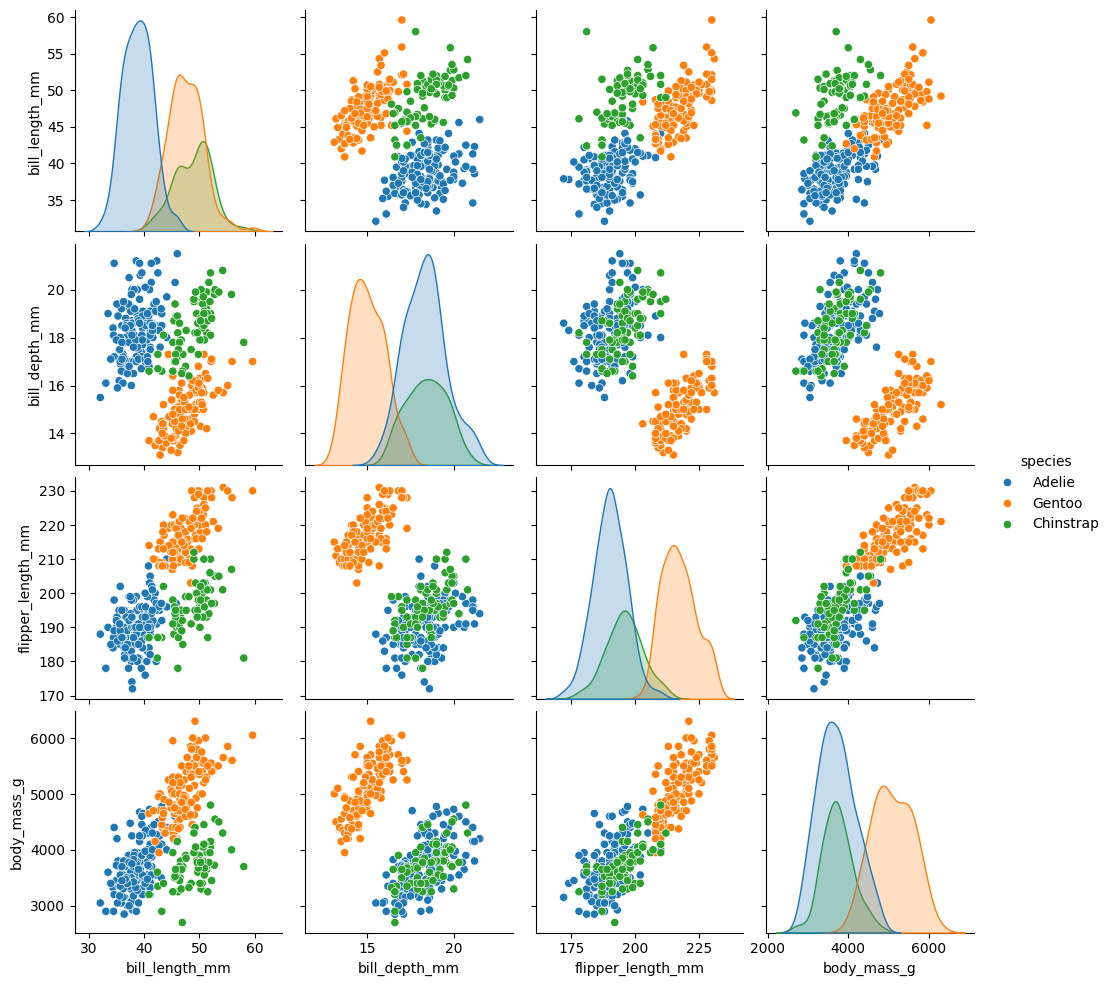

In [ ]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [ ]:
# Only use columns we are interested in
# Normalize the values
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
# Use UMAP to reduce the dataset dimension to 2
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(333, 2)

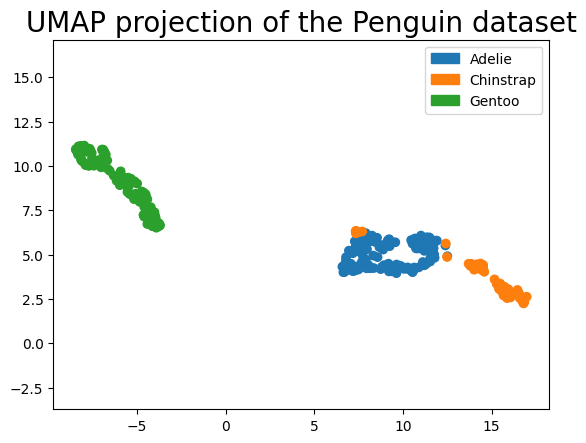

In [ ]:
# Plot the resulting projection

import matplotlib.patches as mpatches

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])

legend_elements = [
    mpatches.Patch(color=sns.color_palette()[0], label='Adelie'),
    mpatches.Patch(color=sns.color_palette()[1], label='Chinstrap'),
    mpatches.Patch(color=sns.color_palette()[2], label='Gentoo'),
]
plt.legend(handles=legend_elements)

plt.gca().set_aspect('equal', "datalim")
plt.title('UMAP projection of the Penguin dataset', fontsize=20);

In [ ]:
# Load the digits dataset
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

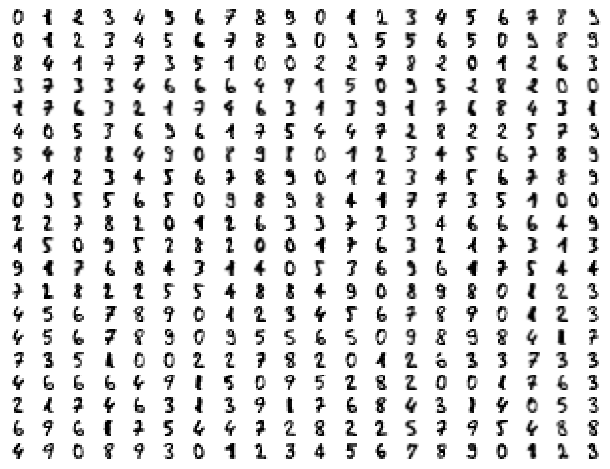

In [ ]:
# Plot the digits
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [ ]:
# Reduce dimension
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(1797, 2)

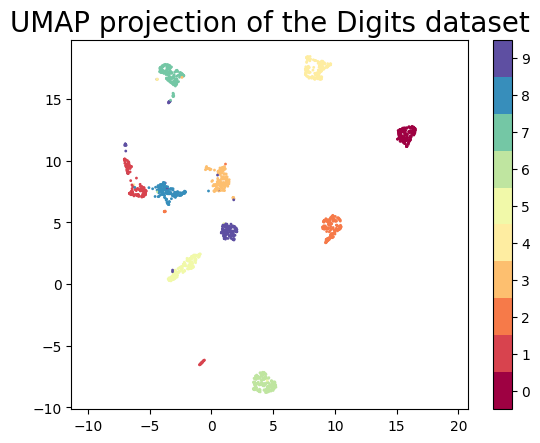

In [ ]:
# Plot the projection
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=1)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=20);

In [ ]:
# Load the Fashion-MNIST dataset
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [ ]:
# Reduce the data and plot it
mapper = umap.UMAP().fit(fmnist.data[:30000])

hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':fmnist.target[:30000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels=fmnist.target[:30000], hover_data=hover_data, point_size=2)
umap.plot.show(p)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

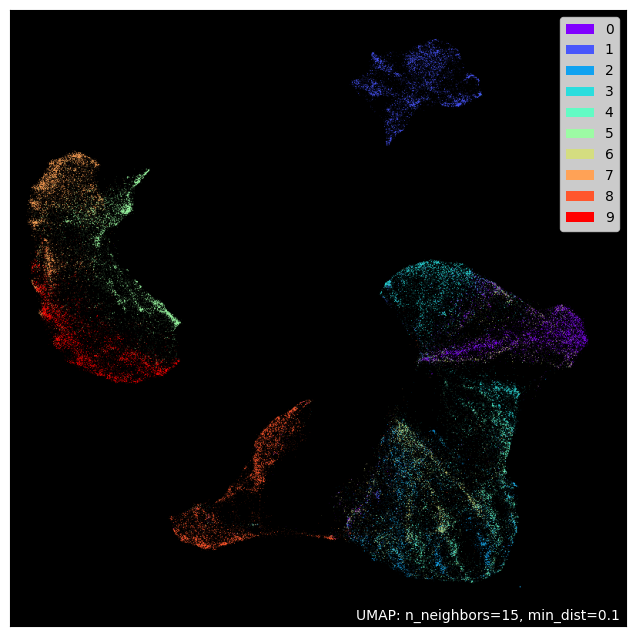

In [ ]:
mapper = umap.UMAP().fit(fmnist.data)
umap.plot.points(mapper, labels=fmnist.target, theme='fire')

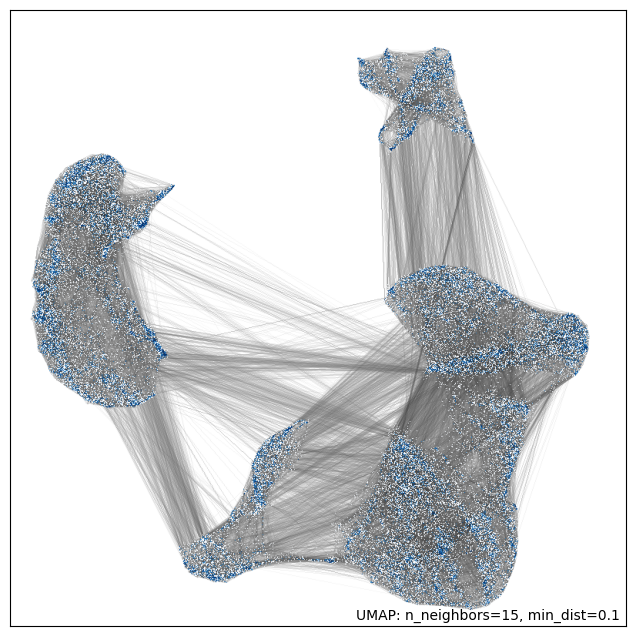

In [ ]:
# Plot the connectivity of the topological space
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


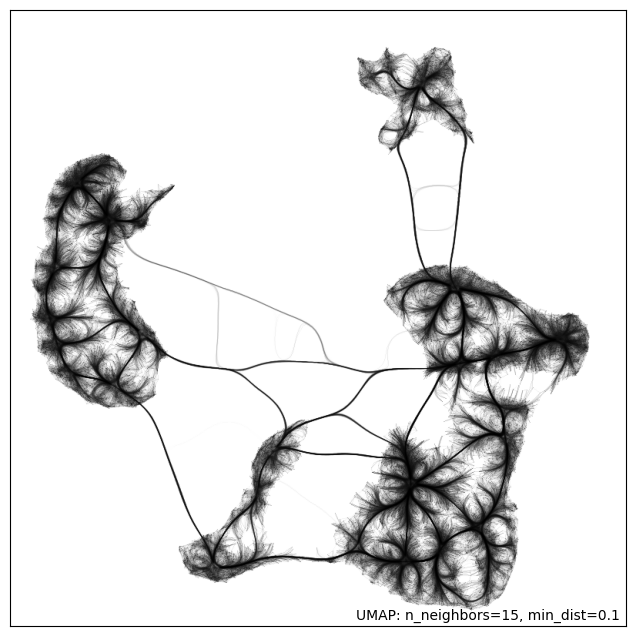

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')